# Analysis General of WarpX output for 2 beams
## Import important packages and set up plotting
If any plots are needing to be saved, go to end of file and edit those commands

In [1]:
import  matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq
import os
import shutil
import scipy as sp
import scipy.constants as sc
import sys
from matplotlib import gridspec
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import SymLogNorm
from matplotlib.colors import LogNorm

from openpmd_viewer import OpenPMDTimeSeries
from openpmd_viewer.addons import LpaDiagnostics

FontSize=25
FontSizeLabelAxis=25
rc('legend',fontsize=FontSize)
rc('xtick',labelsize=FontSize)
rc('ytick',labelsize=FontSize)
font = {'family' : 'normal',
        'size'   : FontSize}

rc('font', **font)
rc('text', usetex=True)

# scaling factors
mm=1e3
MV=1e-6
kV=1e-3

cms = sp.constants.speed_of_light

time = 3.36678*10**-11
zloc = time*cms
print(zloc)

0.010093352517452399


## Define where the files are and what timestep we want to look at

In [6]:
base = '/lstr/sahara/aard/cphillips/'
# Define which case we want to look at
direc = 'energyrecovery/warpx/1p5wavelengthbehind/8581_two_perfect/' #'bebop_opal_Eleg/warpxfromoptim/8058_only_x/' # 'warpx/dist_piot/onebeamcheck/6466_only_x/' #'bebop_opal_Eleg/warpxfromoptim/7950_only_x/'
direc = 'energyrecovery/warpx/morechargewitness/8627_two_perfect/'
direc = 'energyrecovery/warpx/shiftwitness/8629_two_perfect/'
direc = 'bebop_opal_Eleg/3warpxfromoptim/10cm/rect/11002_two_rect_10cm/'
#direc = 'bebop_opal_Eleg/3warpxfromoptim/10cm/square/11001_two_square_10cm/'
#direc = 'bebop_opal_Eleg/3warpxfromoptim/10cm/circle/10891_two_perfect/'
#direc = 'bebop_opal_Eleg/3warpxfromoptim/10cm/circle/11003_two_circ_2p5wavelen/'

# 1 nC; 2 nC; 5 nC
direc = '1nC/2beam/3warpx/erika/17180_1_2_nomw/'
direc = '1nC/2beam/3warpx/square_test/19886_sq_2/'
direc = '1nC/2beam/3warpx/square_test/19925_sq_2/'
direc = '1nC/2beam/3warpx/squaoptimize/21858_test_dist/'
direc = '1nC/2beam/3warpx/squa/22103_test_dist/'
direc = '1nC/2beam/3warpx/squa/22196_probe_1/'
direc = '1nC/2beam/3warpx/squa/26541_AAC/'
#direc = '1nC/2beam/3warpx/squa/drive/26863_AAC/'
#direc = '2nC/2beam/3warpx/erika/
#direc = '5nC/2beam/3warpx/erika/
# drive, witness, both

direc = '1nC/2beam/3warpx/squa/ts0/27003_scan/'
#direc = '1nC/2beam/3warpx/squa/ts1/27004_scan/'
#direc = '1nC/2beam/3warpx/squa/ts2/27005_scan/'
#direc = '1nC/2beam/3warpx/squa/ts3/27006_scan/'
#direc = '1nC/2beam/3warpx/squa/ts4/27007_scan/'
#direc = '1nC/2beam/3warpx/squa/ts5/27008_scan/'
#direc = '1nC/2beam/3warpx/squa/ts6/27009_scan/'
direc = '1nC/2beam/3warpx/squa/notideal/27029_scan/'
direc = '1nC/2beam/3warpx/squa/ideal/27086_scan/'
direc = '1nC/2beam/3warpx/squa/ideal/27246_long/'
direc = '1nC/2beam/3warpx/squa/scan/ideal/28012_long/'
direc = '1nC/2beam/3warpx/squa/scan/ideal/28045_long/'
#direc = '1nC/2beam/3warpx/squa/ideal/27096_short/'

direc = '1nC/2beam/3warpx/squa/scan/ts0/28374_long/'
direc = '1nC/2beam/3warpx/squa/scan/ts1/28375_long/'
#direc = '1nC/2beam/3warpx/squa/scan/ts2/28376_long/'
#direc = '1nC/2beam/3warpx/squa/scan/ts3/28377_long/'
#direc = '1nC/2beam/3warpx/squa/scan/ts4/28378_long/'
#direc = '1nC/2beam/3warpx/squa/scan/ts9/28392_long/'
direc = '1nC/2beam/3warpx/squa/scan/ts9/28725_long/'
direc = '1nC/2beam/3warpx/squa/scan/ts9/28735_long/'

Nitera = 15
# 15

drvtxt = base+direc+'diags/reducedfiles/reduced_diags_drive.txt'
wtntxt = base+direc+'diags/reducedfiles/reduced_diags_witns.txt'
dprobetxtfile = base+direc+'diags/reducedfiles/probe.txt'
print(drvtxt)
filedir = '/lstr/sahara/aard/cphillips/'+direc+'diags/slabmovingwarpx/'
ts = LpaDiagnostics(filedir)

N_iterations = len(ts.iterations)

if Nitera==-1:
   it = ts.iterations[N_iterations-1]
else:
   it = ts.iterations[Nitera]
print(Nitera)
print(N_iterations)

/lstr/sahara/aard/cphillips/1nC/2beam/3warpx/squa/scan/ts9/28735_long/diags/reducedfiles/reduced_diags_drive.txt
15
44


### Now, import all data

In [7]:
# ---------------------------------------
# Start by importing the drive bunch data
dv = open(drvtxt)
datdv = dv.read().split("\n")
header = datdv[0]
print('Available info in reduced diagnostics: ',header)

ardv = []
[ardv.append(list(map(lambda x: float(x), row.split(" ")))) for row in datdv[1:-1]]
ardv = np.array(ardv)
    
dvstep = ardv[:, 0]
dvtime = ardv[:, 1] # s
dvxmean = ardv[:, 2] # m
dvymean = ardv[:, 3] # m
dvzmean = ardv[:, 4] # m
dvxrms = ardv[:, 9] # m
dvyrms = ardv[:, 10] # m
dvzrms = ardv[:,11]
dvemitx = ardv[:,16] # m
dvemity = ardv[:,17] # m
dvemitz = ardv[:,18] # m


# ---------------------------------------
# Now we can import the witness bunch data
wt = open(wtntxt)
datwt = wt.read().split("\n")
header = datwt[0]
print('Available info in reduced diagnostics: ',header)

arwt = []
[arwt.append(list(map(lambda x: float(x), row.split(" ")))) for row in datwt[1:-1]]
arwt = np.array(arwt)

wtstep = arwt[:, 0]
wttime = arwt[:, 1] # s
wtxmean = arwt[:, 2] # m
wtymean = arwt[:, 3] # m
wtzmean = arwt[:, 4] # m
wtxrms = arwt[:, 9] # m
wtyrms = arwt[:, 10] # m
wtzrms = arwt[:,11]
wtemitx = arwt[:,16] # m
wtemity = arwt[:,17] # m
wtemitz = arwt[:,18] # m

zstructure = wttime*cms
zstructure = zstructure - 0.01
dlastpart = [dvzmean[i]-dvzrms[i] for i in np.arange(len(dvzmean))]
wlastpart = [wtzmean[i]-wtzrms[i] for i in np.arange(len(wtzmean))]
for i in np.arange(len(dlastpart)):
    if dlastpart[i] > 0.1:
        dindlast = i-1
        break
    else:
        dindlast = -1
for i in np.arange(len(wlastpart)):
    if wlastpart[i] > 0.1:
        windlast = i-1
        break
    else: 
        windlast = -1

dt_particles_end = dvtime[dindlast]
wt_particles_end = wttime[windlast]
print('dz and wz: ',dt_particles_end*cms,wt_particles_end*cms)
print('dt and wt: ', dt_particles_end,wt_particles_end)
print('dlastpart,wlastpart: ',dlastpart,wlastpart)

separation = [(dvzmean[i] - wtzmean[i])*1e3 for i in np.arange(len(dvzrms))]

# retrieve the data from the hdf5 file for the electric and magnetic fields
Ez, info_Ez = ts.get_field( iteration=it,  field='E', coord='z',
                            slicing_dir='x', plot=False)
Ex, info_Ex = ts.get_field( iteration=it,  field='E', coord='x',
                            slicing_dir='x', plot=False)
Ey, info_Ey = ts.get_field( iteration=it,  field='E', coord='y',
                            slicing_dir='x', plot=False)
Bx, info_Bx = ts.get_field( iteration=it,  field='B', coord='x',
                            slicing_dir='x', plot=False)
By, info_By = ts.get_field( iteration=it,  field='B', coord='y',
                            slicing_dir='x', plot=False)

dxf, dyf, dzf, dpx, dpy, dpz = ts.get_particle( ['x','y','z','ux','uy','uz'],  species='drive', iteration=it)
wxf, wyf, wzf, wpx, wpy, wpz = ts.get_particle( ['x','y','z','ux','uy','uz'],  species='witns', iteration=it)

print('Drive/Witness Num Particles: ',len(dxf),len(wxf))
shapeEz= np.shape(Ez)

print('z, y, x grid size: ',shapeEz)

absmax=MV*max(np.max(np.max(np.abs(Ez))),np.abs(np.min(np.min(np.abs(Ez)))))

zsc=np.linspace(info_Ez.zmin*1e3, info_Ez.zmax*1e3, shapeEz[0])

'''
# Are there particles that should be "lost"?
print('boundary in x is [-2,2]')
print('boundary in y is [-1,1]')
print('xmax: ',max(xf),' xmin: ',min(xf))
print('ymax: ',max(yf),' ymin: ',min(yf))
n = 0
zf = zf[n:]
xf = xf[n:]
yf = yf[n:]
px = px[n:]
py = py[n:]
pz = pz[n:]
print('zmax: ',max(zf),' zmin: ',min(zf))
print('xmean: ',np.mean(xf))
print('ymean: ',np.mean(yf))
print('zmean: ',np.mean(zf))
print('xp: ',np.mean(px))
print('yp: ',np.mean(py))
print('zp: ',np.mean(pz))
'''
print('Domain:')
print('xmin/max: ',info_Ez.xmin*mm,info_Ez.xmax*mm)
print('ymin/max: ',info_Ez.ymin*mm,info_Ez.ymax*mm)
print('zmin/max: ',info_Ez.zmin*mm,info_Ez.zmax*mm)

print('DRIVE')
print('drive emittances (x, y, z): ',dvemitx[0],dvemity[0],dvemitz[0])
print('drive rms 0 (x, y, z): ',dvxrms[0],dvyrms[0],dvzrms[0])
print('"last" of last is at z= ',dt_particles_end*cms*mm,' mm')
print('last at this ts at z = ', np.min(dzf)*mm, ' mm')
print('drive length 0/last (ps): ',dvzrms[0]/cms*1e12,dvzrms[dindlast]/cms*1e12)
#print('txt drive mean (x, y, z): ',dvxmean[-1],dvymean[-1],dvzmean[-1])
print('WX drive mean (x, y, z): ',np.mean(dxf),np.mean(dyf), np.mean(dzf)*mm)

print(' ')
print('WITNESS')
print('witness emittances (x, y, z): ',wtemitx[0],wtemity[0],wtemitz[0])
print('witness rms 0 (x, y, z): ',wtxrms[0],wtyrms[0],wtzrms[0])
print('"last" of last is at z= ',wt_particles_end*cms*mm,' mm')
print('last at this ts at z = ', np.min(wzf)*mm, ' mm')
print('witness length 0/last (ps): ',wtzrms[0]/cms*1e12,wtzrms[windlast]/cms*1e12)
#print('witness mean (x, y, z): ',wtxmean[-1],wtymean[-1],wtzmean[-1])
print('WX witness mean (x, y, z): ',np.mean(wxf),np.mean(wyf), np.mean(wzf)*mm)

print(' ')
print('original separation')
print('txt separation: ',separation[0])
print('H5 here separation (mm): ',(np.mean(dzf) - np.mean(wzf))*mm)
print(' ')
print(' ')
print('number of particles at this ts: ',len(dxf),len(wxf))

Available info in reduced diagnostics:  #[0]step() [1]time(s) [2]x_mean(m) [3]y_mean(m) [4]z_mean(m) [5]px_mean(kg*m/s) [6]py_mean(kg*m/s) [7]pz_mean(kg*m/s) [8]gamma_mean() [9]x_rms(m) [10]y_rms(m) [11]z_rms(m) [12]px_rms(kg*m/s) [13]py_rms(kg*m/s) [14]pz_rms(kg*m/s) [15]gamma_rms() [16]emittance_x(m) [17]emittance_y(m) [18]emittance_z(m) [19]charge(C)
Available info in reduced diagnostics:  #[0]step() [1]time(s) [2]x_mean(m) [3]y_mean(m) [4]z_mean(m) [5]px_mean(kg*m/s) [6]py_mean(kg*m/s) [7]pz_mean(kg*m/s) [8]gamma_mean() [9]x_rms(m) [10]y_rms(m) [11]z_rms(m) [12]px_rms(kg*m/s) [13]py_rms(kg*m/s) [14]pz_rms(kg*m/s) [15]gamma_rms() [16]emittance_x(m) [17]emittance_y(m) [18]emittance_z(m) [19]charge(C)
dz and wz:  0.10633064062499853 0.11599706249999822
dt and wt:  3.54680839319175e-10 3.86924551984554e-10
dlastpart,wlastpart:  [-0.01101728902998962, -0.00618433898435854, -0.001351386167807051, 0.00348156663865902, 0.00831451948892385, 0.01314747239236224, 0.01798042534901183, 0.022813

[5.896611608070099, 5.896603041797789, 5.8965949550092684, 5.89658717159692, 5.896579435239831, 5.89657169806989, 5.896563953312901, 5.896556201970299, 5.896548444321699, 5.896540680549001, 5.896532910842598, 5.896525135408496, 5.896517354455899, 5.896509568201703, 5.896501776870795, 5.896493980695902, 5.8964861799186075, 5.896478374789696, 5.896470565570203, 5.896462752531903, 5.896454935958098, 5.896447116144205, 5.896439293399003, 5.896431466177105, 5.896423597010994, 5.896415736981991, 5.896407899017006, 5.896400065375007, 5.896392233095016, 5.896384401207016, 5.8963765693050005, 5.896368737211, 5.896360904803998, 5.8963530720179955, 5.383317702145979, -153.218965032059, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


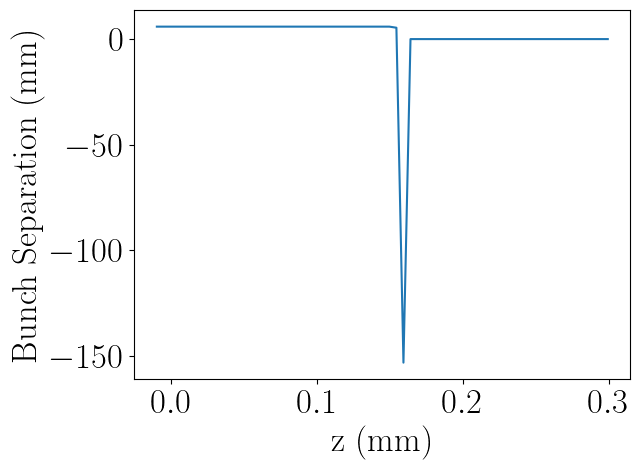

In [5]:
print(separation)
plt.plot(zstructure,separation)
#plt.ylim([5.5,5.7])
plt.xlabel('z (mm)')
plt.ylabel('Bunch Separation (mm)') 
#plt.xlim([-.01,.13])
plt.show()
#print(len(separation))
#print(separation[31])

## Plotting rms values, emittances, and phase spaces

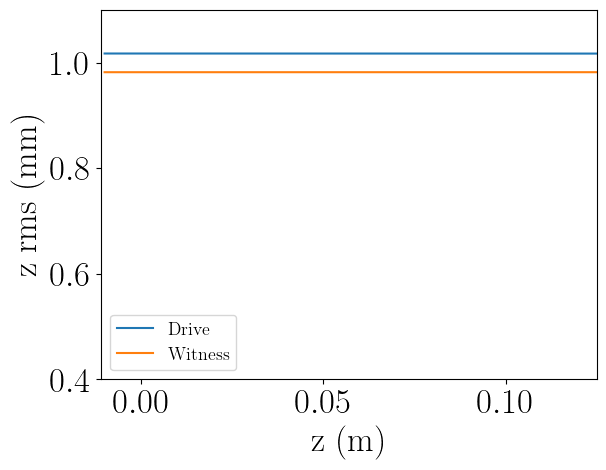

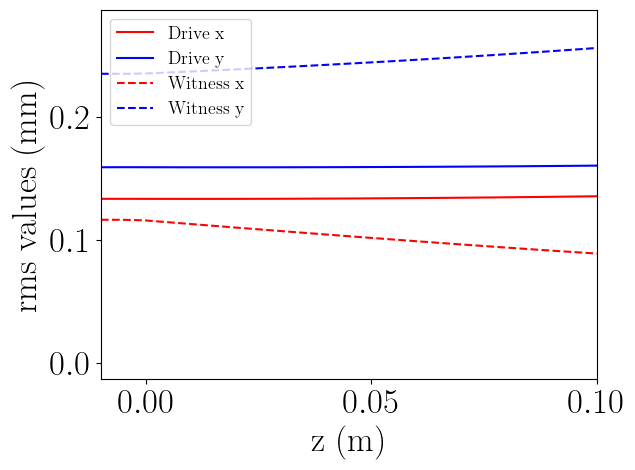

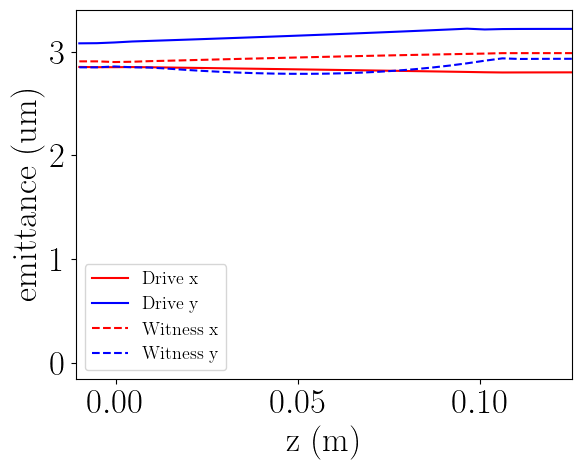

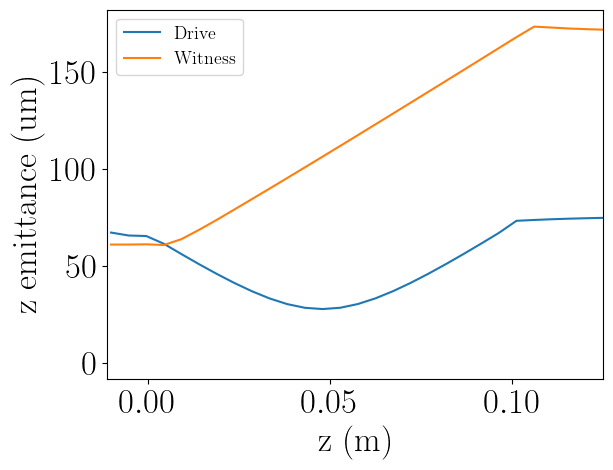

number of macroparticles:  30000
number of macroparticles:  30000


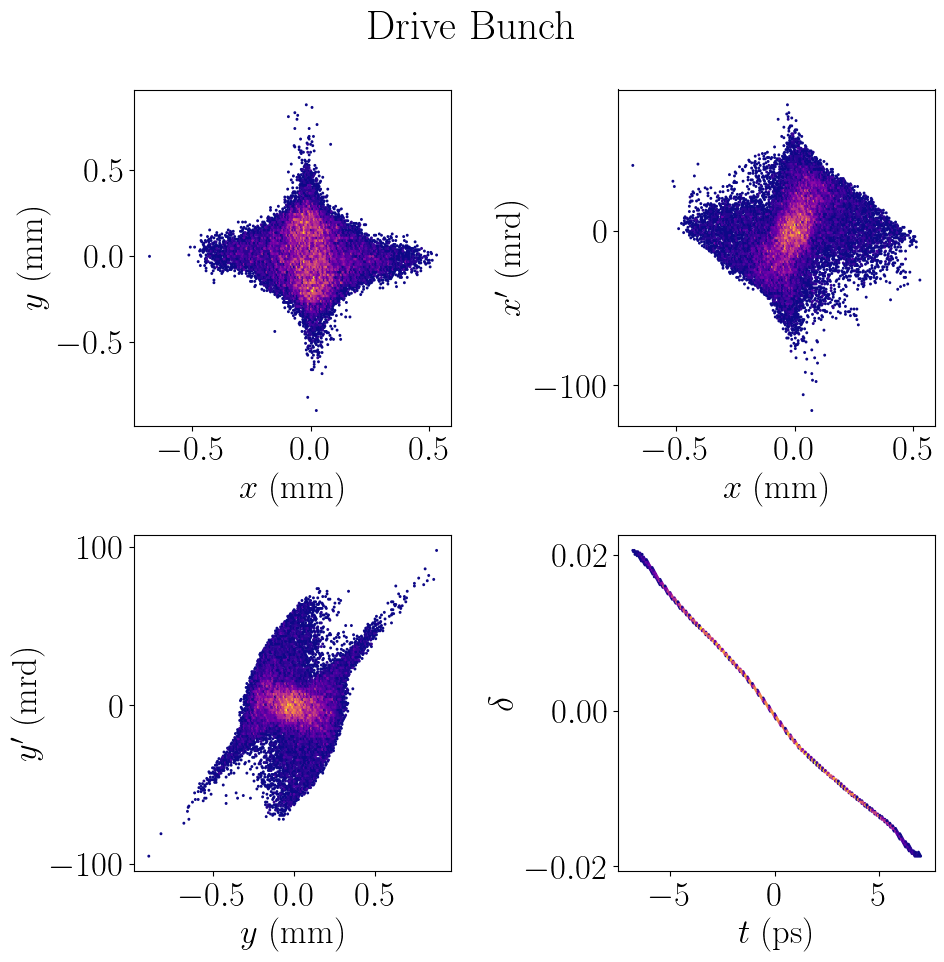

<Figure size 640x480 with 0 Axes>

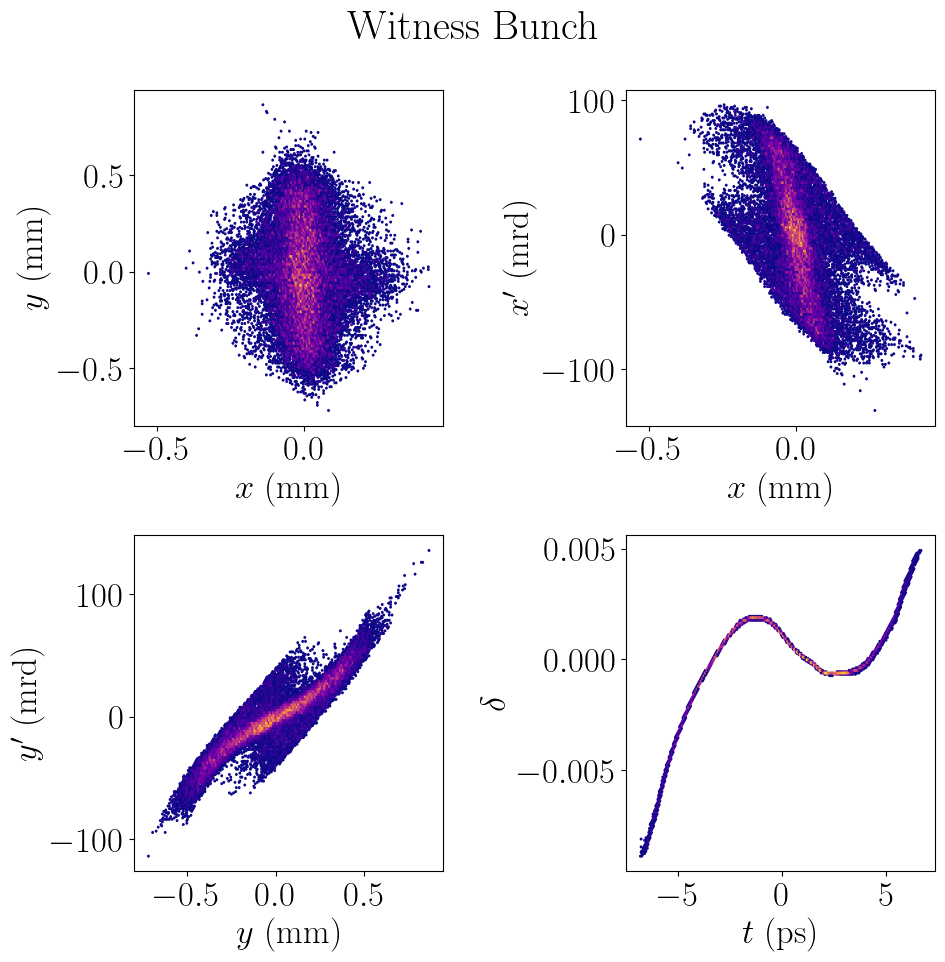

<Figure size 640x480 with 0 Axes>

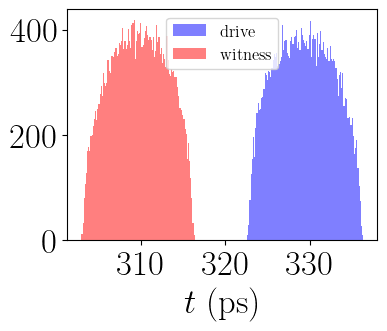

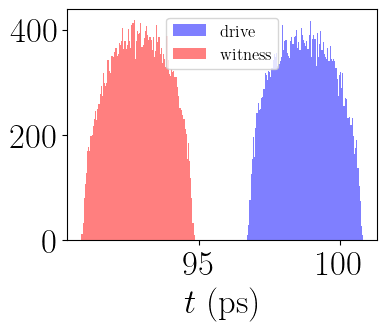

In [6]:
# First three are the rms and emittance throughout the structure, so we use zstructure for its location in the structure
#print('emitx = ',emitx[0], 'm')
#print('emity = ',emity[0], 'm')
#print('emitz = ',emitz[0], 'm')

plt.plot(zstructure,dvzrms*mm,label='Drive')
plt.plot(zstructure,wtzrms*mm,label='Witness')
plt.xlabel('z (m)')
plt.ylabel('z rms (mm)')
plt.legend(fontsize=13)
plt.xlim([-0.011,0.125])
plt.ylim([0.4,1.1])
plt.show()

plt.plot(zstructure,dvxrms*1e3,'r',label='Drive x')
plt.plot(zstructure,dvyrms*1e3,'b',label='Drive y')
plt.plot(zstructure,wtxrms*1e3,'r--',label='Witness x')
plt.plot(zstructure,wtyrms*1e3,'b--',label='Witness y')
plt.legend(loc='upper left',fontsize=13)
plt.xlabel('z (m)')
plt.ylabel('rms values (mm)')
plt.xlim([-0.01,0.1])
plt.show()

dvemitxu = dvemitx*1e6
dvemityu = dvemity*1e6
dvemitzu = dvemitz*1e6
wtemitxu = wtemitx*1e6
wtemityu = wtemity*1e6
wtemitzu = wtemitz*1e6

plt.plot(zstructure,dvemitxu,'r',label='Drive x')
plt.plot(zstructure,dvemityu,'b',label='Drive y')
plt.plot(zstructure,wtemitxu,'r--',label='Witness x')
plt.plot(zstructure,wtemityu,'b--',label='Witness y')
#plt.plot(z,emitz,label='z')
plt.legend(fontsize=13)
plt.xlabel('z (m)')
plt.ylabel('emittance (um)')
plt.xlim([-0.011,0.125])
plt.show()

plt.plot(zstructure,dvemitzu,label='Drive')
plt.plot(zstructure,wtemitzu,label='Witness')
plt.legend(fontsize=13)
plt.xlabel('z (m)')
plt.ylabel('z emittance (um)')
plt.xlim([-0.011,0.125])
plt.show()

# --------------------------------------------------------------
# we want to plot four phase spaces: x-y, x-x', y-y' and t-delta
# Have to plot this next part separately; first DRIVE
dt = (dzf-np.mean(dzf))/cms
frac=100
MinCnt = 1+int(len(dt)-frac/100*len(dt))
nBins = 201
print('number of macroparticles: ',len(dt))

dptot = np.sqrt(dpx**2+dpy**2 + dpz**2)
dptot = dptot/dptot.mean()-1

# Have to plot this next part separately
fig, axlist = plt.subplots(2,2,figsize=(10,10))
ax = axlist[0,0]
ax.hexbin(dxf*1e3,dyf*1e3,gridsize=nBins,mincnt=MinCnt, cmap='plasma')
ax.set_xlabel('$x$ (mm)')
ax.set_ylabel('$y$ (mm)')
ax = axlist[0, 1]
ax.set_xlabel('$x$ (mm)')
ax.set_ylabel('$x\'$ (mrd)')
ax.hexbin(dxf*1e3, dpx*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax = axlist[1,0]
ax.set_xlabel('$y$ (mm)')
ax.set_ylabel('$y\'$ (mrd)')
ax.hexbin(dyf*1e3, dpy*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax = axlist[1,1]
ax.hexbin(dt*1e12, dptot, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax.set_xlabel('$t$ (ps)')
ax.set_ylabel(r'$\delta$')
plt.tight_layout()
plt.suptitle('Drive Bunch')
fig.subplots_adjust(top=0.9)
plt.figure()


# Have to plot this next part separately; now, WITNESS
wt = (wzf-np.mean(wzf))/cms
frac=100
MinCnt = 1+int(len(wt)-frac/100*len(wt))
nBins = 201
print('number of macroparticles: ',len(wt))

wptot = np.sqrt(wpx**2+wpy**2 + wpz**2)
wptot = wptot/wptot.mean()-1


# Have to plot this next part separately
fig, axlist = plt.subplots(2,2,figsize=(10,10))
ax = axlist[0,0]
ax.hexbin(wxf*1e3,wyf*1e3,gridsize=nBins,mincnt=MinCnt, cmap='plasma')
ax.set_xlabel('$x$ (mm)')
ax.set_ylabel('$y$ (mm)')
ax = axlist[0, 1]
ax.set_xlabel('$x$ (mm)')
ax.set_ylabel('$x\'$ (mrd)')
ax.hexbin(wxf*1e3, wpx*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax = axlist[1,0]
ax.set_xlabel('$y$ (mm)')
ax.set_ylabel('$y\'$ (mrd)')
ax.hexbin(wyf*1e3, wpy*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax = axlist[1,1]
ax.hexbin(wt*1e12, wptot, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax.set_xlabel('$t$ (ps)')
ax.set_ylabel(r'$\delta$')
plt.tight_layout()
plt.suptitle('Witness Bunch')
fig.subplots_adjust(top=0.9)
plt.figure()


plt.figure(figsize=(4,3))
plt.hist(dzf/cms*1e12,bins=100,color='b',alpha=0.5,label='drive')
plt.hist(wzf/cms*1e12,bins=100,color='r',alpha=0.5,label='witness')
plt.xlabel('$t$ (ps)')
plt.legend(fontsize=12)
plt.show()

plt.figure(figsize=(4,3))
plt.hist(dzf*mm,bins=100,color='b',alpha=0.5,label='drive')
plt.hist(wzf*mm,bins=100,color='r',alpha=0.5,label='witness')
plt.xlabel('$t$ (ps)')
plt.legend(fontsize=12)
plt.show()


## Plotting Ez wake in (z,y) and (z,x) with lineout of Ez

[154.57600627 154.6702271  154.76444793 154.85866876 154.95288959]
zrange:  54 106
zindexmin:  976  zindexmax:  1527
max of E_z in this range (MeV):  3.3503909715977347


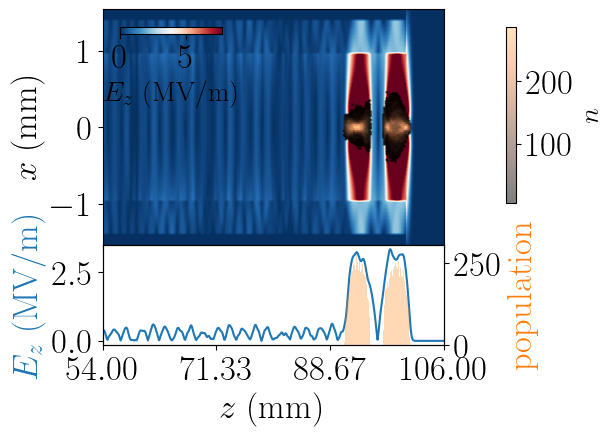

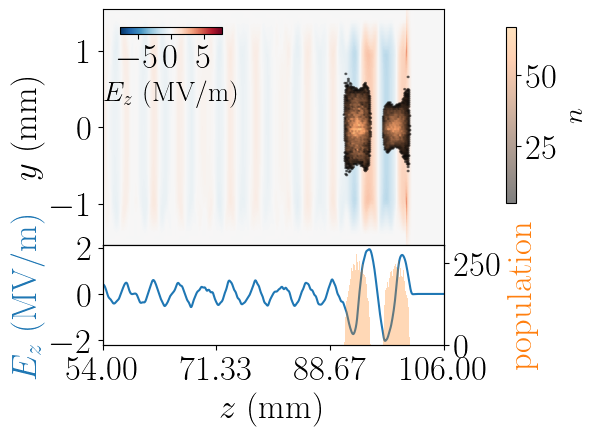

In [10]:
zlow = 54 #info_Ez.zmin*mm
zhigh = 106 #info_Ez.zmax*mm
#zlow = info_Ez.zmin*mm
#zhigh = info_Ez.zmax*mm
print(zsc[-5:])
mult = 1
lenz = zhigh-zlow
xticklist = np.arange(zlow,zhigh+lenz/2,lenz/3)
indexmin = (np.abs(zsc - zlow)).argmin()
indexmax = (np.abs(zsc - zhigh)).argmin()
print('zrange: ',zlow,zhigh)
print('zindexmin: ',indexmin,' zindexmax: ',indexmax)

Etot = np.sqrt(Ex**2+Ey**2+Ez**2)

# generate a plot of the Ez wake in (z,y) with lineout of Ez
fig=plt.figure(9999)
gs1 = gridspec.GridSpec(11, 13)
ax1 = fig.add_subplot(gs1[0:7,1:10])
ax2 = fig.add_subplot(gs1[7:10,1:10], sharex =ax1)
ax3 = fig.add_subplot(gs1[0:7,11:12])


# record Ez in the (z,x) plane for y=0
Ezslice=Etot[indexmin:indexmax,int(shapeEz[1]/2),:].transpose()*MV # gets the y=0 slice
shapeEzslice = np.shape(Ezslice)

# plot slice (upper plot with red and blue lines)
imField=ax1.imshow(Ezslice,extent=[zlow,zhigh, info_Ez.xmin*mm,info_Ez.xmax*mm],
                   cmap='RdBu_r', vmin=0,vmax=absmax/mult, aspect='auto')
cbaxes = inset_axes(ax1, width="30%", height="3%", loc=2)
cbar1  = fig.colorbar(imField, cax=cbaxes, orientation='horizontal').set_label(label=r'$E_z$ (MV/m)',size=20)
ax1.set_ylabel(r'$x$ (mm)', fontsize=FontSizeLabelAxis)

# record particle and plot a histogram on top of 3d of Ez - NEED TO ADJUST AXES FOR THIS
particles=ax1.hexbin(dzf*mm, dxf*mm, gridsize=200,extent=[zlow,zhigh, info_Ez.xmin*mm,info_Ez.xmax*mm], cmap='copper', alpha=0.5,  mincnt=5)
particles=ax1.hexbin(wzf*mm, wxf*mm, gridsize=200,extent=[zlow,zhigh, info_Ez.xmin*mm,info_Ez.xmax*mm], cmap='copper', alpha=0.5,  mincnt=5)
ax3.axis('off')
cbaxes2 = inset_axes(ax3, width="30%", height="75%", loc=2)
cbar2 = fig.colorbar(particles, cax=cbaxes2).set_label(label=r'$n$ ',size=20)

# Line plot of Ez plus histogram of the population on lower plot
zsca=np.linspace(zlow,zhigh, indexmax-indexmin)
ax2.plot (zsca,Ezslice[int(shapeEzslice[0]/2),:]) # gets the y=0 slice
print('max of E_z in this range (MeV): ',max(np.max(Ezslice[int(shapeEzslice[0]/2)]),np.abs(np.min(Ezslice[int(shapeEzslice[0]/2),:]))))
ax2.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
ax2.set_ylabel(r'$E_z$ (MV/m) ', fontsize=FontSizeLabelAxis, color="C0")

ax2.set_xticks(xticklist)
ax22 = ax2.twinx()
ax22.hist(dzf*mm,shapeEz[0], range=(zlow,zhigh),alpha=0.3, color='C1')
ax22.hist(wzf*mm,shapeEz[0], range=(zlow,zhigh),alpha=0.3, color='C1')
ax22.set_ylabel(r'population', fontsize=FontSizeLabelAxis, color="C1")

# Set up the plots
plt.setp(ax1.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax2.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
#plt.subplots_adjust(hspace=.0)

# Save the plot to be viewed
#plt.savefig(save_dir+fig9999)
#plt.savefig(save_dir+fig9999p,dpi=600)
plt.savefig('/lstr/sahara/aard/cphillips/ipynbfiles/AAC24/paper/2bunchWX.png')
plt.show()



# record Ez in the (z,y) plane for x=0
fig=plt.figure(9998)
gs1 = gridspec.GridSpec(11, 13)
ax1 = fig.add_subplot(gs1[0:7,1:10])
ax2 = fig.add_subplot(gs1[7:10,1:10], sharex =ax1)
ax3 = fig.add_subplot(gs1[0:7,11:12])

# record Ez in the (z,y) plane for x=0
Ezslice=Ez[indexmin:indexmax,:,int(shapeEz[2]/2)].transpose()*MV # gets the x=0 slice
shapeEzslice = np.shape(Ezslice)


# plot slice (upper plot with red and blue lines)
imField=ax1.imshow(Ezslice,extent=[zlow,zhigh, info_Ez.ymin*mm,info_Ez.ymax*mm],
                   cmap='RdBu_r', vmin=-absmax/mult, vmax=absmax/mult, aspect='auto')
cbaxes = inset_axes(ax1, width="30%", height="3%", loc=2)
cbar1  = fig.colorbar(imField, cax=cbaxes, orientation='horizontal').set_label(label=r'$E_z$ (MV/m)',size=20)
ax1.set_ylabel(r'$y$ (mm)', fontsize=FontSizeLabelAxis)

# record particle and plot a histogram on top of 3d of Ez
particles=ax1.hexbin(dzf*mm, dyf*mm, gridsize=200,extent=[zlow,zhigh, info_Ez.ymin*mm,info_Ez.ymax*mm], cmap='copper', alpha=0.5,  mincnt=5)
particles=ax1.hexbin(wzf*mm, wyf*mm, gridsize=200,extent=[zlow,zhigh, info_Ez.ymin*mm,info_Ez.ymax*mm], cmap='copper', alpha=0.5,  mincnt=5)
ax3.axis('off')
cbaxes2 = inset_axes(ax3, width="30%", height="75%", loc=2)
cbar2 = fig.colorbar(particles, cax=cbaxes2).set_label(label=r'$n$ ',size=20)

# Line plot of Ez plus histogram of the population on lower plot
ax2.plot (zsca,Ezslice[int(shapeEzslice[0]/2),:]) # Ez slice has shape (ylen,zlen)
#ax2.plot (zsca,Ey[16,48,:]*1e-6)

ax2.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
ax2.set_ylabel(r'$E_z$ (MV/m) ', fontsize=FontSizeLabelAxis, color="C0")
ax2.set_xticks(xticklist)
ax22 = ax2.twinx()
ax22.hist(dzf*mm,shapeEz[0], range=(zlow,zhigh),alpha=0.3, color='C1')
ax22.hist(wzf*mm,shapeEz[0], range=(zlow,zhigh),alpha=0.3, color='C1')
ax22.set_ylabel(r'population', fontsize=FontSizeLabelAxis, color="C1")

# Set up the plots
plt.setp(ax1.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax2.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
#plt.subplots_adjust(hspace=.0)

# Save the plot to be viewed
#plt.savefig(save_dir+fig9998)
#plt.savefig(save_dir+fig9998p,dpi=600)
plt.show()

Available info in reduced diagnostics:  [0]step() [1]time(s) [2]part_x_lev0-(m) [3]part_y_lev0-(m) [4]part_z_lev0-(m) [5]part_Ex_lev0-(V/m) [6]part_Ey_lev0-(V/m) [7]part_Ez_lev0-(V/m) [8]part_Bx_lev0-(T) [9]part_By_lev0-(T) [10]part_Bz_lev0-(T) [11]part_S_lev0-(W/m^2)
1 6415
2 2400
6415
4 4015


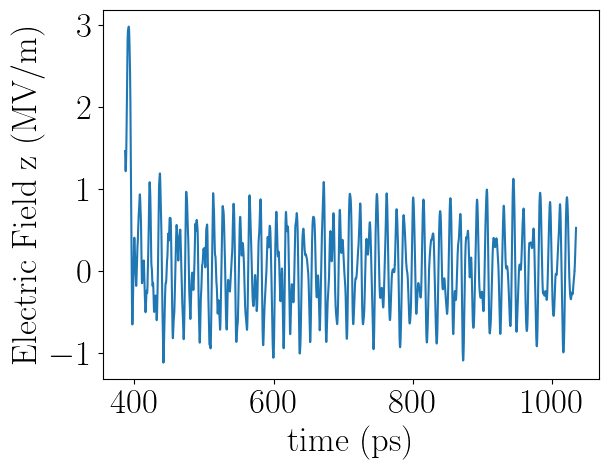

In [10]:
dfile = open(dprobetxtfile)

ddat = dfile.read().split("\n")

header = ddat[0]
print('Available info in reduced diagnostics: ',header)

dar = []
[ dar.append(list(map(lambda x: float(x), row.split(' ')))) for row in ddat[1:-1]]
ddar = np.array(dar)

# Get data for drive bunch
dstep = ddar[:,0]
dtesttime = ddar[:,1]

for i in np.arange(len(dtesttime)):
    if dtesttime[i] > wt_particles_end:
        indlast = i-1
        break
print('1',len(dtesttime))
print('2',indlast)

#indlast = 900
print(len(ddar[:,1][:]))
dtime = ddar[:, 1][indlast:]*1e12 # ps
dloc_x = ddar[:, 2][indlast:] # m
dloc_y = ddar[:, 3][indlast:] #m 
dloc_z = ddar[:, 4][indlast:] # m
dEx = ddar[:, 5][indlast:] # V/m
dEy = ddar[:, 6][indlast:] # V/m
dgEz = ddar[:,7][indlast:] # V/m
dBx = ddar[:,8][indlast:] # T
dBy = ddar[:,9][indlast:] # T
dBz = ddar[:,10][indlast:] # T
dPV = ddar[:,11][indlast:] # W/m^2
print('4',len(dtime))

plt.plot(dtime,dgEz*MV,label='z')
plt.xlabel('time (ps)')
plt.ylabel('Electric Field z (MV/m)')
#plt.xlim([max(dtime),min(dtime)])
plt.show()






[1464657.42176128, 1378165.25114879, 1305135.92861511, 1252616.4023253, 1223631.40271156, 1218556.45619628, 1234646.28284014, 1268366.57415656, 1316091.83584639, 1375301.4244206, 1445292.24637551, 1526246.36984729, 1619668.13065563, 1726191.52824648, 1846113.39433361, 1977542.8077391, 2117231.39892645, 2260054.14489834, 2399949.88393893, 2530662.53249862, 2646462.39187063, 2743306.98501565, 2819037.4478469, 2873974.88868583, 2910463.21402168, 2932471.61564933, 2944747.37584537, 2951849.15537618, 2957465.14899439, 2963724.61438078, 2971034.18080574, 2978220.96492925, 2982761.60098442, 2981719.80531228, 2972017.4545814, 2951640.23703462, 2919639.61039461, 2876770.83174784, 2825010.79370499, 2767013.16413454, 2705319.80613798, 2641063.85319676, 2573694.69374748, 2500283.41342024, 2416482.61232434, 2317183.17538086, 2198172.37975892, 2057243.44055651, 1895023.85087912, 1715065.55313379, 1523032.88621601, 1325556.06137814, 1128656.63052921, 936628.199109453, 751318.62227195, 572313.57886443

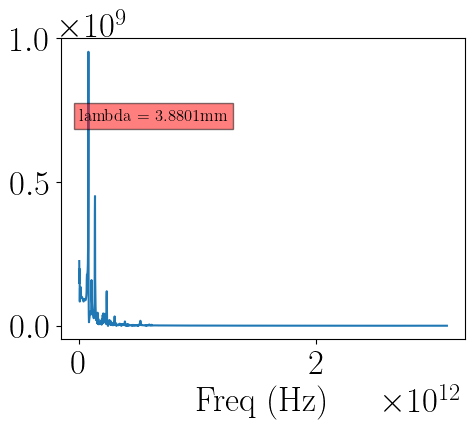

In [11]:
# Doing FFT to get the wavelength of the accelerated bunch from the 1D probe
#aEzslice =gEz[:maxtime]*MV # takes the x=0 slice
#zint = time[:maxtime]/1e12 # convert z axis to a time axis



aEzslice = dgEz
zint = dtime/1e12
print(aEzslice.tolist())
print(zint.tolist())
print(np.shape(aEzslice))
aEzslicelen = len(aEzslice) # get length of aEzslice for N (with x=0 above and y=0 (transposed above))
print(aEzslicelen/2)
#samplerate = aEzslicelen/((info_Ez.zmax*1e3-info_Ez.zmin*1e3)/cms) # N/(t_f - t_i) = N/((zmax(mm) - zmin(mm))/cms) so that end wavelength is mm
samplerate = aEzslicelen/(zint[-1]-zint[0]) #(zhigh-zlow)/cms) # N/(t_f - t_i) = N/((zmax(mm) - zmin(mm))/cms) so that end wavelength is mm

Fy = fft(aEzslice) # do fft
Fx = fftfreq(aEzslicelen,1 / samplerate) # get the fft frequencies

# get the maximum of Fy
freqmax = np.amax(np.abs(Fy))
# which frequency does the max of Fy correspond to?
indexfreq = np.where(np.abs(Fy) == freqmax)
flatind = indexfreq[0]
print('max freq ',freqmax, ' located at ',Fx[flatind[0]])
# convert the frequency to wavelength using f = c/lambda
wavelength = cms/np.abs(Fx[flatind[0]])
print('wavelength = ', wavelength*mm, ' mm')
wavem = wavelength
freqs = wavem/cms
freq = 1/freqs
skindepth_cu = 1/np.sqrt(sc.pi*sc.mu_0*freq*1.68e8)
skindepth_al = 1/np.sqrt(sc.pi*sc.mu_0*freq*2.82e8)
print('copper skin depth: ',skindepth_cu*1e9,' nm')
print('aluminum skin depth: ',skindepth_al*1e9,' nm')

# Plotting to see the frequencies to check with wavelength on plot
figfreq = plt.figure(9997)
gs1 = gridspec.GridSpec(11, 11)
ax1 = figfreq.add_subplot(gs1[1:10,1:10])
ax1.text(0,freqmax*3/4,'lambda = '+str(round(wavelength,8)*1e3)+'mm',bbox=dict(facecolor='red',alpha = 0.5),fontsize=12)
#Fx[flatind[0]]*2+Fx[flatind[1]]/2
imFreqs = ax1.plot(Fx[:len(Fx) //2],np.abs(Fy[:len(Fx)//2]))
#plt.xlim(0,2e9) # 0,(np.amax(Fx)/Fx[flatind[1]])*(3/5)*Fx[flatind[1]])
ax1.set_xlabel("Freq (Hz)")
#plt.savefig(save_dir+fig9997)
#plt.savefig(save_dir+fig9997p,dpi=600)
plt.show()

# Anything from here down maybe doesn't work? I'm not positive, but it might not be anything we need rn

max freq  945.9355223583016  located at  46619876.88063791
wavelength =  6.4305716372346176  mm


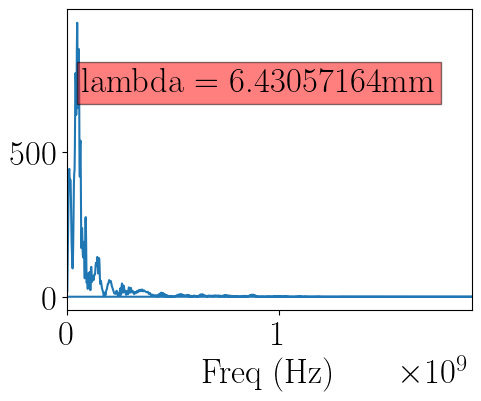

In [9]:
# Doing FFT to get the wavelength of the accelerated bunch for (y,z) slice
Ezslice =Ez[:,:,int(shapeEz[2]/2)].transpose()*MV # takes the x=0 slice
zint = dzf/cms # convert z axis to a time axis
Ezslicelen = len(Ezslice[int(shapeEz[1]/2),:]) # get length of Ezslice for N (with x=0 above and y=0 (transposed above))

samplerate = Ezslicelen/((info_Ez.zmax*1e3-info_Ez.zmin*1e3)/cms) # N/(t_f - t_i) = N/((zmax(mm) - zmin(mm))/cms) so that end wavelength is mm

Fy = fft(Ezslice[int(shapeEz[1]/2)]) # do fft
Fx = fftfreq(Ezslicelen,1 / samplerate) # get the fft frequencies

# get the maximum of Fy
freqmax = np.amax(np.abs(Fy))
# which frequency does the max of Fy correspond to?
indexfreq = np.where(np.abs(Fy) == freqmax)
flatind = indexfreq[0]
print('max freq ',freqmax, ' located at ',Fx[flatind[0]])
# convert the frequency to wavelength using f = c/lambda
wavelength = cms/np.abs(Fx[flatind[0]])
print('wavelength = ', wavelength, ' mm')

# Plotting to see the frequencies to check with wavelength on plot
figfreq = plt.figure(9997)
gs1 = gridspec.GridSpec(11, 11)
ax1 = figfreq.add_subplot(gs1[1:10,1:10])
ax1.text(Fx[flatind[0]]*2+Fx[flatind[1]]/2,freqmax*3/4,'lambda = '+str(round(wavelength,8))+'mm',bbox=dict(facecolor='red',alpha = 0.5))
imFreqs = ax1.plot(Fx,np.abs(Fy))
plt.xlim(0,(np.amax(Fx)/Fx[flatind[1]])*(3/5)*Fx[flatind[1]])
ax1.set_xlabel("Freq (Hz)")
#plt.savefig(save_dir+fig9997)
#plt.savefig(save_dir+fig9997p,dpi=600)
plt.show()

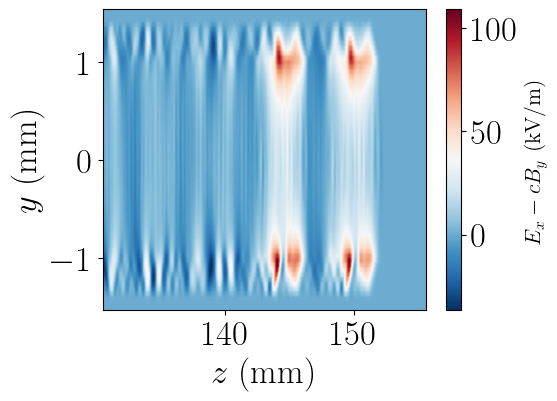

In [7]:
figX=plt.figure(9996)
gs1 = gridspec.GridSpec(11, 11)
ax1 = figX.add_subplot(gs1[1:10,1:10])
Exslice=(Ex[:,:,int(shapeEz[2]/2)].transpose() \
               -cms*By[:,:,int(shapeEz[2]/2)].transpose())*kV
imField=ax1.imshow(Exslice,extent=[info_Ez.zmin*mm,info_Ez.zmax*mm, info_Ez.ymin*mm,info_Ez.ymax*mm],
                   cmap='RdBu_r', aspect='auto')
cbar1  = figX.colorbar(imField).set_label(label=r'$E_x-cB_y$ (kV/m)',size=16)
ax1.set_ylabel(r'$y$ (mm)', fontsize=FontSizeLabelAxis)
ax1.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)

#plt.savefig(save_dir+fig9996)
#plt.savefig(save_dir+fig9996p,dpi=600)
plt.show()

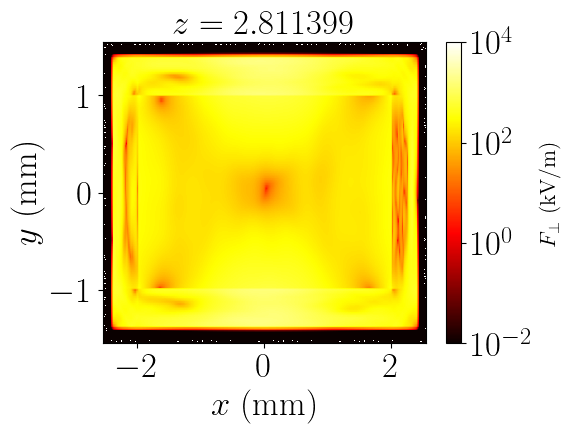

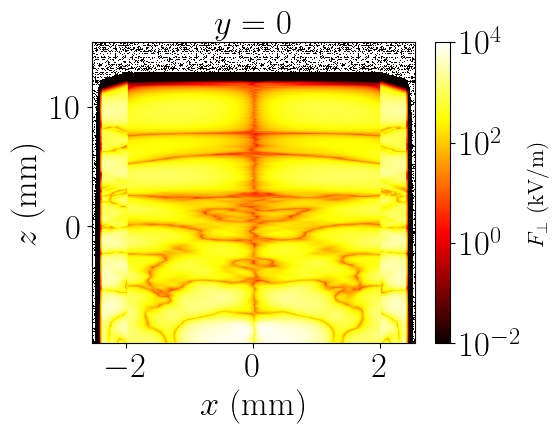

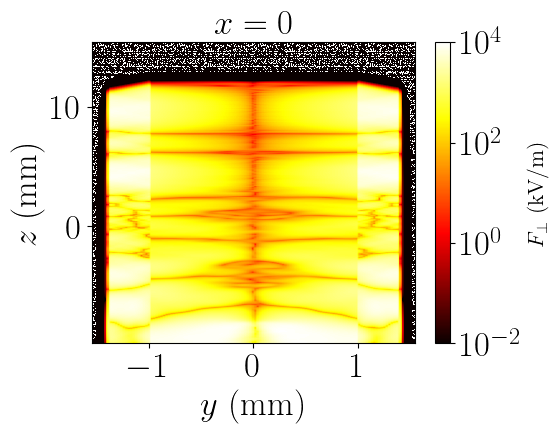

In [10]:
# transverse slice at a given z
figSliceZ=plt.figure(9995)
gs1 = gridspec.GridSpec(11, 11)
ax1 = figSliceZ.add_subplot(gs1[1:10,1:10])

#print ('xySlice::',np.shape(Bx))
Bxshape = np.shape(Bx)
sliceInd=int(Bxshape[0]/2) # HOW IS THIS THOUGHT OF: NEEDS TO CHANGE TO GET THE MODES
Bxslice=Bx[sliceInd,:,:]
Exslice=Ex[sliceInd,:,:]
Eyslice=Ey[sliceInd,:,:]
Byslice=By[sliceInd,:,:]

# F/e computed for an electron
Fx=-(Exslice-cms*Byslice)
Fy=-(Eyslice+cms*Bxslice)

imField=ax1.imshow(np.sqrt(Fx**2+Fy**2)*kV, cmap='hot', norm=LogNorm(vmin=0.01,vmax=1e4),
           extent=[info_Ex.xmin*mm,info_Ex.xmax*mm, info_Ex.ymin*mm,info_Ex.ymax*mm],
           aspect='auto')
figSliceZ.colorbar(imField).set_label(label=r'$F_{\perp}$ (kV/m)',size=16)
ax1.set_ylabel(r'$y$ (mm)', fontsize=FontSizeLabelAxis)
ax1.set_xlabel(r'$x$ (mm)', fontsize=FontSizeLabelAxis)
ax1.set_title(r'$z=%f$'%zsc[sliceInd], fontsize=FontSizeLabelAxis)
#plt.savefig(save_dir+fig9995)
plt.show()


# transverse slice at a given y in (x,z)
figSliceX=plt.figure(9994)  # transverse slice at a given y in (x,z)
gs1 = gridspec.GridSpec(11, 11)
ax1 = figSliceX.add_subplot(gs1[1:10,1:10])

Bxshape = np.shape(Bx)
sliceInd=int(Bxshape[1]/2) # currently for y=0
Bxslice = Bx[:,sliceInd,:]
Byslice = By[:,sliceInd,:]
Exslice = Ex[:,sliceInd,:]
Eyslice = Ey[:,sliceInd,:]

# F/e computed for an electron
Fx=-(Exslice-cms*Byslice)
Fy=-(Eyslice+cms*Bxslice)

imField=ax1.imshow(np.sqrt(Fx**2+Fy**2)*kV, cmap='hot',norm=LogNorm(vmin=0.01,vmax=1e4), extent=[info_Ex.xmin*mm,info_Ex.xmax*mm,info_Ex.zmin*mm,info_Ex.zmax*mm],
           aspect='auto', origin='lower')
figSliceX.colorbar(imField).set_label(label=r'$F_{\perp}$ (kV/m)',size=16)
ax1.set_ylabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
ax1.set_xlabel(r'$x$ (mm)', fontsize=FontSizeLabelAxis)
ax1.set_title (r'$y=0$', fontsize=FontSizeLabelAxis)
#plt.savefig(save_dir+fig9994)
#plt.savefig(save_dir+fig9994p,dpi=600)
plt.show()

# transverse slice at a given x in (y,z)
figSliceY=plt.figure(9993)  # transverse slice at a given x in (y,z)
gs1 = gridspec.GridSpec(11, 11)
ax1 = figSliceY.add_subplot(gs1[1:10,1:10])

Bxshape = np.shape(Bx)
sliceInd=int(Bxshape[2]/2) # currently for x=0
Bxslice = Bx[:,:,sliceInd]
Byslice = By[:,:,sliceInd]
Exslice = Ex[:,:,sliceInd]
Eyslice = Ey[:,:,sliceInd]

# F/e computed for an electron
Fx=-(Exslice-cms*Byslice)
Fy=-(Eyslice+cms*Bxslice)

imField=ax1.imshow(np.sqrt(Fx**2+Fy**2)*kV, cmap='hot', norm=LogNorm(vmin=0.01,vmax=1e4), extent=[info_Ex.ymin*mm,info_Ex.ymax*mm,info_Ex.zmin*mm,info_Ex.zmax*mm],
           aspect='auto', origin='lower')
figSliceY.colorbar(imField).set_label(label=r'$F_{\perp}$ (kV/m)',size=16)
ax1.set_ylabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
ax1.set_xlabel(r'$y$ (mm)', fontsize=FontSizeLabelAxis)
ax1.set_title (r'$x=0$', fontsize=FontSizeLabelAxis)
#plt.savefig(save_dir+fig9993)
#plt.savefig(save_dir+fig9993p,dpi=600)
plt.show()


In [15]:
'''
filedi = '/lstr/sahara/aard/cphillips/warpx/'+filedi
plotspath = filedi+'Plots_ts'+str(it)

# figure names to be used throughout
fig9999 = 'Fig9999_Fullimagexz_ts'+str(it)+'.png'
fig9998 = 'Fig9998_Fullimageyz_ts'+str(it)+'.png'
fig9997 = 'Fig9997_freq_ts'+str(it)+'.png'
fig9996 = 'Fig9996_Ex_cBy_ts'+str(it)+'.png'
fig9995 = 'Fig9995_Ftrans_atz_ts'+str(it)+'.png'
fig9994 = 'Fig9994_Ftrans_aty0_ts'+str(it)+'.png'
fig9993 = 'Fig9993_Ftrans_atx0_ts'+str(it)+'.png'
fig9992 = 'Fig9992_Permittivity_ts'+str(it)+'.png'

fig9999p = 'Fig9999_Fullimagexz_ts'+str(it)+'.pdf'
fig9998p = 'Fig9998_Fullimageyz_ts'+str(it)+'.pdf'
fig9997p = 'Fig9997_freq_ts'+str(it)+'.pdf'
fig9996p = 'Fig9996_Ex_cBy_ts'+str(it)+'.pdf'
fig9995p = 'Fig9995_Ftrans_atz_ts'+str(it)+'.pdf'
fig9994p = 'Fig9994_Ftrans_aty0_ts'+str(it)+'.pdf'
fig9993p = 'Fig9993_Ftrans_atx0_ts'+str(it)+'.pdf'
fig9992p = 'Fig9992_Permittivity_ts'+str(it)+'.pdf'



if len(arg)==4:
   save_dir = arg[3]
else:
   if os.path.isdir(plotspath):
      if os.path.isfile(plotspath+'/'+fig9999):
         os.remove(plotspath+'/'+fig9999)
      if os.path.isfile(plotspath+'/'+fig9998):
         os.remove(plotspath+'/'+fig9998)
      if os.path.isfile(plotspath+'/'+fig9997):
         os.remove(plotspath+'/'+fig9997)
      if os.path.isfile(plotspath+'/'+fig9996):
         os.remove(plotspath+'/'+fig9996)
      if os.path.isfile(plotspath+'/'+fig9995):
         os.remove(plotspath+'/'+fig9995)
      if os.path.isfile(plotspath+'/'+fig9994):
         os.remove(plotspath+'/'+fig9994)
      if os.path.isfile(plotspath+'/'+fig9993):
         os.remove(plotspath+'/'+fig9993)
      if os.path.isfile(plotspath+'/'+fig9992):
         os.remove(plotspath+'/'+fig9992)
      save_dir = plotspath+'/'
   else:
      os.mkdir(plotspath)
      save_dir = plotspath+'/'
'''

"\nfiledi = '/lstr/sahara/aard/cphillips/warpx/'+filedi\nplotspath = filedi+'Plots_ts'+str(it)\n\n# figure names to be used throughout\nfig9999 = 'Fig9999_Fullimagexz_ts'+str(it)+'.png'\nfig9998 = 'Fig9998_Fullimageyz_ts'+str(it)+'.png'\nfig9997 = 'Fig9997_freq_ts'+str(it)+'.png'\nfig9996 = 'Fig9996_Ex_cBy_ts'+str(it)+'.png'\nfig9995 = 'Fig9995_Ftrans_atz_ts'+str(it)+'.png'\nfig9994 = 'Fig9994_Ftrans_aty0_ts'+str(it)+'.png'\nfig9993 = 'Fig9993_Ftrans_atx0_ts'+str(it)+'.png'\nfig9992 = 'Fig9992_Permittivity_ts'+str(it)+'.png'\n\nfig9999p = 'Fig9999_Fullimagexz_ts'+str(it)+'.pdf'\nfig9998p = 'Fig9998_Fullimageyz_ts'+str(it)+'.pdf'\nfig9997p = 'Fig9997_freq_ts'+str(it)+'.pdf'\nfig9996p = 'Fig9996_Ex_cBy_ts'+str(it)+'.pdf'\nfig9995p = 'Fig9995_Ftrans_atz_ts'+str(it)+'.pdf'\nfig9994p = 'Fig9994_Ftrans_aty0_ts'+str(it)+'.pdf'\nfig9993p = 'Fig9993_Ftrans_atx0_ts'+str(it)+'.pdf'\nfig9992p = 'Fig9992_Permittivity_ts'+str(it)+'.pdf'\n\n\n\nif len(arg)==4:\n   save_dir = arg[3]\nelse:\n   if os.p